# Week2授業前課題４　ダーツ投げ問題

# 【問題1】ダーツのまとを選ぶ
ダーツのまとを選ぶためにサイコロを実装しましょう。

In [28]:
import numpy as np

def roll_dice():
    return np.random.choice(np.arange(1,7))

print("サイコロの目は{}です。".format(roll_dice()))

サイコロの目は1です。


# 【問題2】ダーツを投げて、刺さった場所を記録する
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。 刺さった場所（座標）は、配列で保持するようにしてください。

In [29]:
def throw_darts():
    return np.array(np.random.normal(loc = 0,scale = 0.1,size = 2))

print("ダーツの刺さった場所は(x,y)={}である。".format(throw_darts()))

ダーツの刺さった場所は(x,y)=[-0.04893992 -0.207042  ]である。


# 【問題3】ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。

In [30]:
#{ key=どの的に投げたか,  value=[x座標,y座標]のリスト　}の二つを格納するディクショナリ
dice_dic = {}

for i in range(1000):
    dice_num = roll_dice()
    darts_point = throw_darts()
    #初めてroll_dice()番の的にダーツが刺さった時
    if dice_num not in dice_dic:
        dice_dic[dice_num] = darts_point.reshape(1,2)
    else:
        dice_dic[dice_num] = np.concatenate((dice_dic[dice_num],darts_point.reshape(1,2)))

#下のprint文でディクショナリの確認可能
#print(dice_dic)

# 【問題4】ダーツのまとと刺さった位置を描画する
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

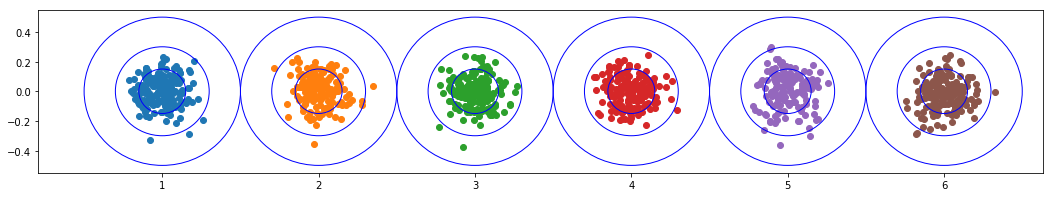

In [149]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig = plt.figure(figsize = (18,3))
ax = fig.add_subplot(1,1,1)
for i in range(1,7):
    ax.scatter(dice_dic[i][:,0]+i,dice_dic[i][:,1])
    c1 = patches.Circle(xy = (i,0),radius = 0.5,color = "b",fill = False)
    c2 = patches.Circle(xy = (i,0),radius = 0.3,color = "b",fill = False)
    c3 = patches.Circle(xy = (i,0),radius = 0.15,color = "b",fill = False)
    ax.add_patch(c1)
    ax.add_patch(c2)
    ax.add_patch(c3)

# 【問題5】関数化
ダーツを投げる回数、ダーツのまとの数が変わっても描画できるように、問題1~問題4で作成したコードを関数化しましょう。

ダーツを投げる回数：800
ダーツのまとの数：8


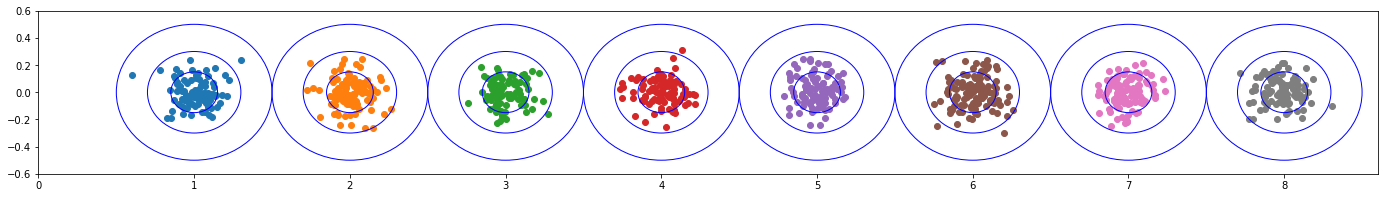

In [150]:
#問題２は関数化済み

#問題１の関数の改良(変化するまとの数に対応)
def roll_dice2(targets):
    return np.random.choice(np.arange(1,targets+1))

#投げる回数とまとの数を引数にとる問題３の関数（的の番号と(x,y)をディクショナリに記録)
def record_darts(trial_num,target_num):
    dice_dic2 = {}
    for i in range(trial_num):
        dice_num = roll_dice2(target_num)  #問題１の関数(改良)
        darts_point = throw_darts()  #問題２の関数
        
        #初めて的にダーツが刺さった時
        if dice_num not in dice_dic2:
            dice_dic2[dice_num] = darts_point.reshape(1,2)
        else:
            dice_dic2[dice_num] = np.concatenate((dice_dic2[dice_num],darts_point.reshape(1,2)))
    #ディクショナリを返す
    return dice_dic2

#ディクショナリを引数にとり、まとの刺さった位置を描画する問題４の関数
def draw_darts(dic):
    fig = plt.figure(figsize = (len(dic)*3,3))
    ax2 = fig.add_subplot(1,1,1)
    ax2.set_xlim([0,len(dic)+0.6])
    ax2.set_ylim([-0.6,0.6])
    for i in range(1,len(dic)+1):
        ax2.scatter(dic[i][:,0]+i,dic[i][:,1])
        c1 = patches.Circle(xy = (i,0),radius = 0.5,color = "b",fill = False)
        c2 = patches.Circle(xy = (i,0),radius = 0.3,color = "b",fill = False)
        c3 = patches.Circle(xy = (i,0),radius = 0.15,color = "b",fill = False)
        ax2.add_patch(c1)
        ax2.add_patch(c2)
        ax2.add_patch(c3)
        
trial_num,target_num = int(input("ダーツを投げる回数：")),int(input("ダーツのまとの数："))
draw_darts(record_darts(trial_num,target_num))